    Abgabe Marquardt 3706017 Data Exploration Project

In [1]:
# Imports

import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, f_classif, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_auc_score, roc_curve

     START EXPLORATION

In [2]:
# Ignore all warnings
warnings.filterwarnings('ignore')

# Load dataset
path = "mushrooms.csv"
mushroom_data = pd.read_csv(path)

In [3]:
# Print shape of mushrooms.csv
mushroom_data.shape

(8124, 23)

In [4]:
# Print first 5 rows of mushrooms.csv
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
# Show column names in mushrooms.csv
mushroom_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# Show general information about mushrooms.csv
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
# Show statistical information about mushrooms.csv
mushroom_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


'e' occurs 4208 times
'p' occurs 3916 times


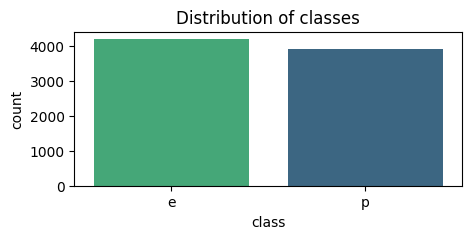

In [8]:
# Determine the frequency of the classes and sort by size
class_counts = mushroom_data['class'].value_counts().sort_values(ascending=False).index

# List of class values to count
class_values = ['e', 'p']

# Loop through class values and count occurrences
for class_val in class_values:
    sum_class = (mushroom_data['class'] == class_val).sum()
    print(f"'{class_val}' occurs {sum_class} times")

# Visualization of the class-distributions
plt.figure(figsize=(5, 2))
sns.countplot(x='class', hue='class', data=mushroom_data, palette='viridis', order=class_counts, legend=False)
plt.title('Distribution of classes')
plt.show()

In [9]:
# Overview of the most common types of mushroom characteristics
print("Characteristic-frequencies of mushroom properties:")
for col in mushroom_data.columns:
    if col != 'class':
        print(f"{mushroom_data[col].value_counts()}\n")

Characteristic-frequencies of mushroom properties:
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

bruises
f    4748
t    3376
Name: count, dtype: int64

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

gill-attachment
f    7914
a     210
Name: count, dtype: int64

gill-spacing
c    6812
w    1312
Name: count, dtype: int64

gill-size
b    5612
n    2512
Name: count, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

stalk-shape
t    4608
e    3516
Name: count, dtype: int64

stalk-root
b    3776
?    2480
e    1120
c     556
r     192
N

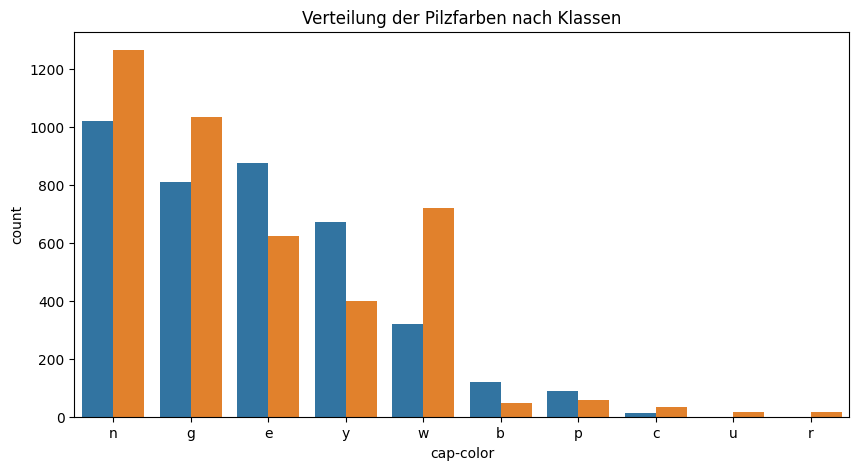

In [10]:
# Determine the frequency of the classes and sort by size
cap_color_counts = mushroom_data['cap-color'].value_counts().sort_values(ascending=False).index

# Visualization of the distribution of mushroom colors by class
plt.figure(figsize=(10, 5))
sns.countplot(x='cap-color', hue='class', data=mushroom_data, order=cap_color_counts, legend=False)
plt.title('Verteilung der Pilzfarben nach Klassen')
plt.show()

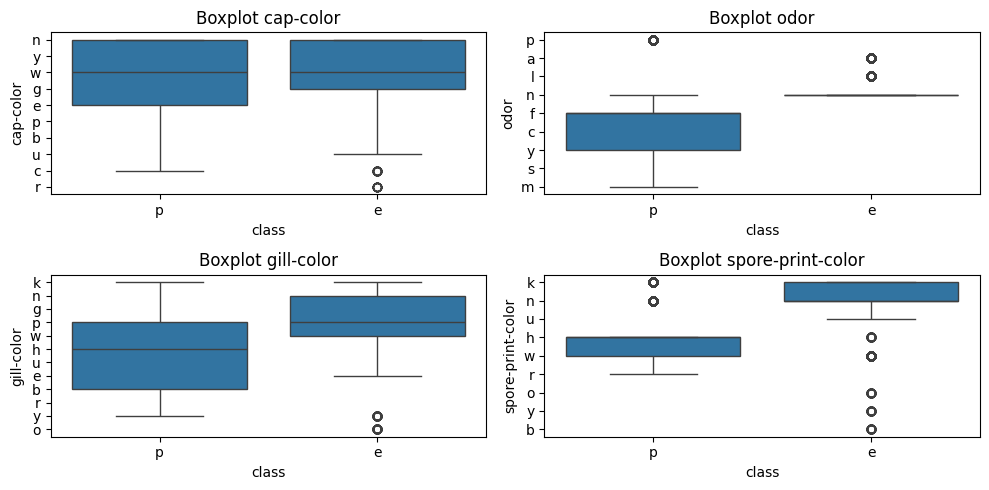

In [11]:
# Create boxplots for selected features
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.boxplot(x='class', y='cap-color', data=mushroom_data)
plt.title('Boxplot cap-color')

plt.subplot(2, 2, 2)
sns.boxplot(x='class', y='odor', data=mushroom_data)
plt.title('Boxplot odor')

plt.subplot(2, 2, 3)
sns.boxplot(x='class', y='gill-color', data=mushroom_data)
plt.title('Boxplot gill-color')

plt.subplot(2, 2, 4)
sns.boxplot(x='class', y='spore-print-color', data=mushroom_data)
plt.title('Boxplot spore-print-color')

plt.tight_layout()
plt.show()

     START MACHINE LEARNING

In [12]:
# Set X as Dataframe without Index (edible, poisonous)
X=mushroom_data.drop('class', axis=1) 

# Set y as Index (edible, poisonous)
y=mushroom_data['class'] 

# Show first 5 rows of X
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


    Encoding due to categorial variables

In [13]:
# Use LabelEncoder for X and y
Encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])

Encoder_y = LabelEncoder()
y = Encoder_y.fit_transform(y)

# Split dataset in training and test
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Number of samples for training set:{X_train.shape}")
print(f"Number of samples for test set:{X_test.shape}")

Number of samples for training set:(6499, 22)
Number of samples for test set:(1625, 22)


    Feature selection

/Users/julian/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/julian/Library/Python/3.9/lib/python/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


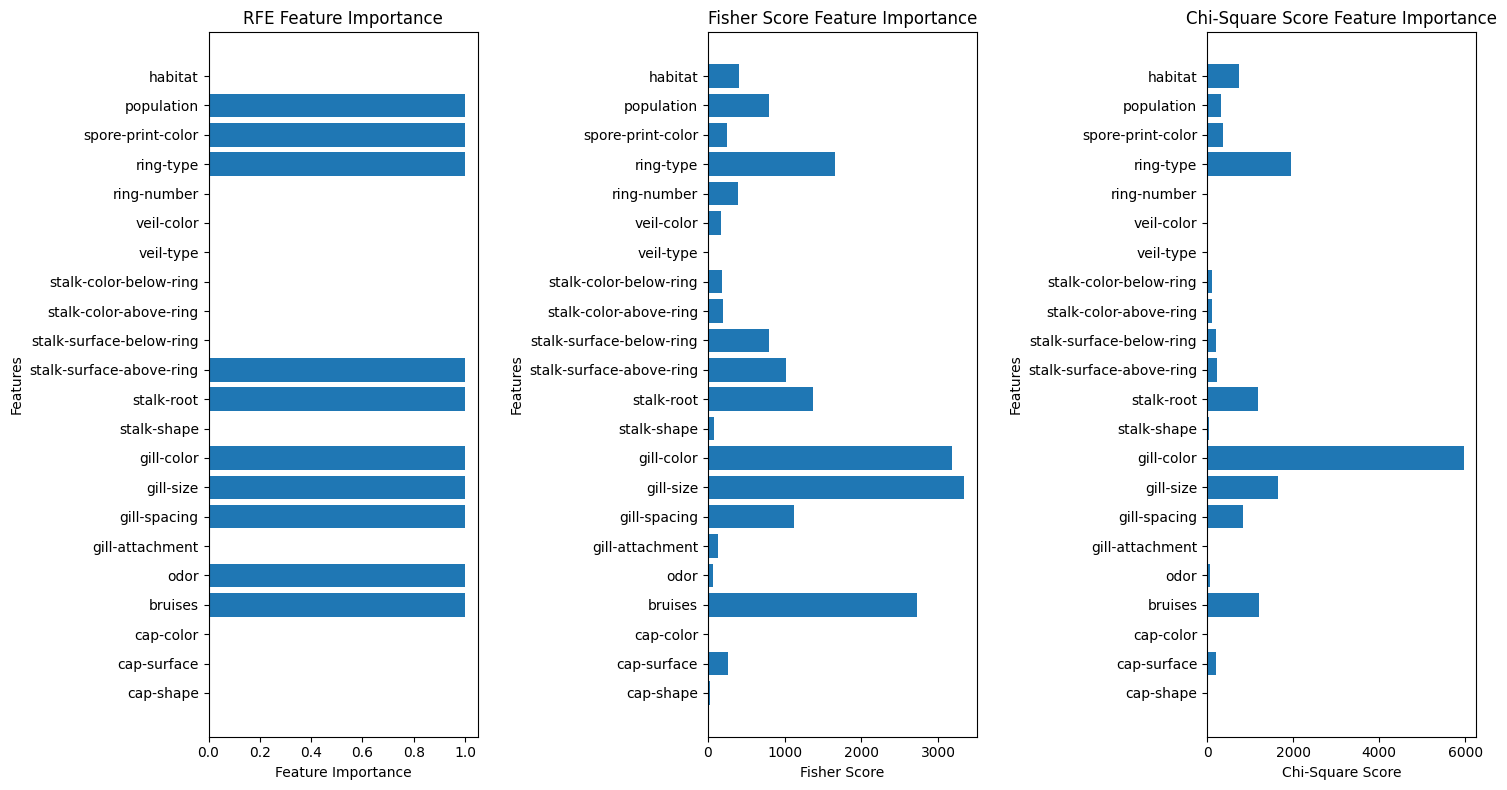

In [14]:
# Initialization of the RandomForestClassifier
randomForest = RandomForestClassifier()

# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=randomForest, n_features_to_select=10, step=1)
rfe.fit(X_train, Y_train)
selected_features_rfe = X.columns[rfe.support_]
rfe_scores = rfe.support_.astype(int)
'''
RFE outputs bool-value for features wheter important = True or False
'''

# Feature selection using Fisher score
fisher_scores, _ = f_classif(X, y)
top_fisher_features = [X.columns[i] for i in np.argsort(fisher_scores)[-10:]]

# Feature selection using chi-square-score
chi2_scores, _ = chi2(X, y)
top_chi2_features = [X.columns[i] for i in np.argsort(chi2_scores)[-10:]]

# Plotting all three feature-evalutation-models
plt.figure(figsize=(15, 8))


plt.subplot(1, 3, 1)
plt.barh(range(len(rfe_scores)), rfe_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('RFE Feature Importance')

plt.subplot(1, 3, 2)
plt.barh(range(len(fisher_scores)), fisher_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Fisher Score Feature Importance')

plt.subplot(1, 3, 3)
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Chi-Square Score Feature Importance')

plt.tight_layout()
plt.show()


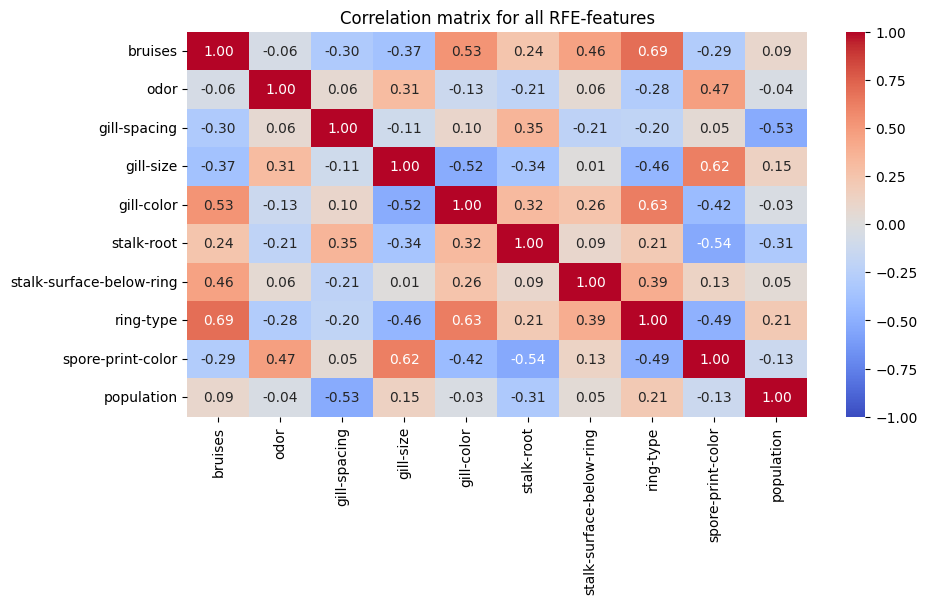

In [15]:
# Heatmap for all RFE-Features
selected_features = ['bruises', 'odor', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-below-ring', 'ring-type',
       'spore-print-color', 'population']

# Create a copy of the dataset to make changes
mushroom_data_encoded = mushroom_data.copy()

# Label encoding for categorical features
label_encoder = LabelEncoder()
for feature in selected_features:
    mushroom_data_encoded[feature] = label_encoder.fit_transform(mushroom_data_encoded[feature])

# Calculating the correlation matrix
correlation_matrix = mushroom_data_encoded[selected_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix for all RFE-features')
plt.show()


     Dummy classifier

In [16]:
# Define a custom dummy classifier
class DummyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.most_frequent_class = None

    def fit(self, X, y):
        # Find the most frequent class
        self.most_frequent_class = np.argmax(np.bincount(y))
        return self

    def predict(self, X):
        # Return the most frequent class for all samples
        return np.full(X.shape[0], self.most_frequent_class)

# Initialize and train dummy classifier
dummy_clf = DummyClassifier()

dummy_clf.fit(X_train, Y_train)

# Make prediction
y_pred = dummy_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy dummy classifier: {accuracy:.2f}")

Accuracy dummy classifier: 0.52


     k-Nearest-Neighbour

In [17]:
# List of values for k from 1 to 25 for future iterations
k_values = list(range(1, 26))

# Initialize empty list for saving accuracy scores
accuracies = []

# Iterate over k-values
for k in k_values:
    # Initialize kNN-classificator with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Cross-validation to estimate the accuracy and standard deviation
    scores = cross_val_score(knn, X_train, Y_train, cv=5)
    
    # Calculate the mean value and standard deviation of the accuracy values
    mean_score = scores.mean()
    std_score = scores.std()
    
    # Calculate bootstrap standard deviation
    bootstrap_std_error = std_score / np.sqrt(len(scores))
    
    # Print for current k
    print(f"{mean_score:.4f} (+/- {bootstrap_std_error:.4f}) for k = {k}")


0.9995 (+/- 0.0002) for k = 1
0.9992 (+/- 0.0002) for k = 2
0.9991 (+/- 0.0004) for k = 3
0.9988 (+/- 0.0006) for k = 4
0.9978 (+/- 0.0007) for k = 5
0.9975 (+/- 0.0007) for k = 6
0.9968 (+/- 0.0006) for k = 7
0.9948 (+/- 0.0007) for k = 8
0.9951 (+/- 0.0006) for k = 9
0.9940 (+/- 0.0007) for k = 10
0.9943 (+/- 0.0008) for k = 11
0.9931 (+/- 0.0008) for k = 12
0.9938 (+/- 0.0007) for k = 13
0.9918 (+/- 0.0011) for k = 14
0.9925 (+/- 0.0009) for k = 15
0.9897 (+/- 0.0006) for k = 16
0.9902 (+/- 0.0008) for k = 17
0.9880 (+/- 0.0007) for k = 18
0.9883 (+/- 0.0007) for k = 19
0.9869 (+/- 0.0006) for k = 20
0.9871 (+/- 0.0006) for k = 21
0.9855 (+/- 0.0009) for k = 22
0.9857 (+/- 0.0008) for k = 23
0.9854 (+/- 0.0010) for k = 24
0.9860 (+/- 0.0009) for k = 25


    XG-Boost

In [18]:
# Encoding for xgBoost due to categorial variables
xg_encoder = LabelEncoder()
Y_train_encoded = xg_encoder.fit_transform(Y_train)
Y_test_encoded = xg_encoder.transform(Y_test)

# Defining a list of booster parameters
booster_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001]}

# Iterate over the booster parameters
for max_depth in booster_params['max_depth']:
    for learning_rate in booster_params['learning_rate']:
        # Initialize the XGBoost classifier with the current parameters
        xgb_classifier = xgb.XGBClassifier(max_depth=max_depth, learning_rate=learning_rate)
        
        # Cross-validation to estimate the accuracy and standard deviation
        scores = cross_val_score(xgb_classifier, X_train, Y_train_encoded, cv=5)
        
        # Calculate the mean value and standard deviation of the accuracy values
        mean_score = scores.mean()
        std_score = scores.std()
        
        # Calculate bootstrap standard deviation
        bootstrap_std_error = std_score / np.sqrt(5)
        
        # Print for current combination of parameters
        print(f"{mean_score:.4f} (+/- {bootstrap_std_error:.4f}) for {{'max_depth': {max_depth}, 'learning_rate': {learning_rate}}}")

1.0000 (+/- 0.0000) for {'max_depth': 3, 'learning_rate': 0.1}
0.9792 (+/- 0.0017) for {'max_depth': 3, 'learning_rate': 0.01}
0.9512 (+/- 0.0069) for {'max_depth': 3, 'learning_rate': 0.001}
1.0000 (+/- 0.0000) for {'max_depth': 5, 'learning_rate': 0.1}
0.9940 (+/- 0.0007) for {'max_depth': 5, 'learning_rate': 0.01}
0.9817 (+/- 0.0027) for {'max_depth': 5, 'learning_rate': 0.001}
1.0000 (+/- 0.0000) for {'max_depth': 7, 'learning_rate': 0.1}
0.9994 (+/- 0.0006) for {'max_depth': 7, 'learning_rate': 0.01}
0.9985 (+/- 0.0009) for {'max_depth': 7, 'learning_rate': 0.001}


     Random-Forest-Classificator

Accuracy Random-Forest: 1.0000


Classification report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



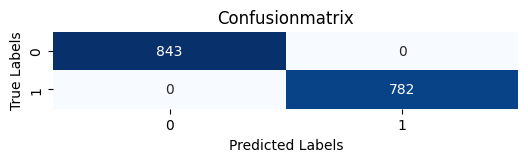

In [19]:
# Identify columns with categorical data
categorical_columns = X.select_dtypes(include=['object']).columns

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Transform data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, Y_train)

# Make predictions on test data
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluation of the model on the test data
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred, target_names = ["Edible", "Poisonous"])

# Show results
print(f'Accuracy Random-Forest: {accuracy:.4f}\n')
print('\nClassification report:')
print(classification_rep)

# Compute and plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusionmatrix')
plt.show()

    Support-Vector-Machine

Classification report:

              precision    recall  f1-score   support

      Edible       0.96      0.95      0.96       843
   Poisonous       0.95      0.96      0.96       782

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



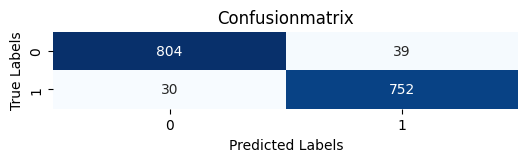

In [20]:
# Initialize OrdinalEncoder for ordinal features and LabelEncoder for target labels
enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

# Transform the training and test features using OrdinalEncoder
x_train_transf = enc_x.fit_transform(X_train)
x_test_transf = enc_x.transform(X_test)

# Transform the training and test target labels using LabelEncoder
y_train_transf = enc_y.fit_transform(Y_train)
y_test_transf = enc_y.transform(Y_test)

# Initialize MinMaxScaler to scale the features to a specified range
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)

# Rescale the training features
x_train_rescaled = scaling.transform(x_train_transf)

# Set the regularization parameter C for the SVM
C = 1.0

# Initialize SVM classifier with linear kernel and fit to the rescaled training data
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

# Predict the target labels for the test features
y_pred_test = svc.predict(scaling.transform(x_test_transf))

# Print the classification report
print("Classification report:")
print()
print(classification_report(y_test_transf, y_pred_test, target_names=["Edible", "Poisonous"]))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test_transf, y_pred_test)
plt.figure(figsize=(6, 1))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusionmatrix')
plt.show()

    Hypertuning Support-Vector-Machine for precision and recall

In [21]:
# Define the hyperparameters to be tuned for SVM classifier
tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10, 100]},
    {"kernel": ["poly"], "C": [1, 10, 100]},
]

# Define the scoring metrics for evaluation
scores = ["precision", "recall"]

# Loop over each scoring metric
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    # Initialize GridSearchCV with SVM classifier, tuned parameters and scoring metric
    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    
    # Fit GridSearchCV to the rescaled training data
    clf.fit(x_train_rescaled, y_train_transf)

    # Print the best parameters found on the development set
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    
    # Print the grid scores on the development set
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    
    # Loop over each combination of mean score, standard deviation and hyperparameters
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    
    # Print the classification report on the test set
    print("Classification report:")
    print()
    
    # Predict the target labels for the test features using the best estimator
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    
    # Print the classification report
    print(classification_report(y_true, y_pred, target_names=["Edible", "Poisonous"]))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'kernel': 'poly'}

Grid scores on development set:

0.958 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.982 (+/-0.012) for {'C': 10, 'kernel': 'linear'}
0.986 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
1.000 (+/-0.000) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 100, 'kernel': 'poly'}

Classification report:

              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


# Tuning hyper-parameters for recall



    AOC and ROC

In [ ]:
# Generate synthetic dataset with 8124 samples, 23 features, and a binary target variable just as mushrooms.csv (see mushroom_data.shape)
X2, y2 = make_classification(n_samples=8124, n_features=23, random_state=42)

# Split the dataset into training and test sets with a ratio of 80:20
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Fit the model on the training data
model.fit(X2_train, y2_train)

# Predict probabilities for the test set
y2_pred_prob = model.predict_proba(X2_test)[:, 1]

# Compute the Area Under the Receiver Operating Characteristic Curve (ROC AUC) score
auc = roc_auc_score(y2_test, y2_pred_prob)

# Print the ROC AUC score
print(f"AUC: {auc:.2f}")

In [ ]:
# Calculate ROC-curve
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_prob)

# Plot ROC-curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()